In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [2]:
df = pd.read_csv('datasets/youtube-new/USvideos.csv')
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
cols = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']
for col in cols:
    print(df[col].value_counts())
    print('-' * 50)

False    40316
True       633
Name: comments_disabled, dtype: int64
--------------------------------------------------
False    40780
True       169
Name: ratings_disabled, dtype: int64
--------------------------------------------------
False    40926
True        23
Name: video_error_or_removed, dtype: int64
--------------------------------------------------



 mu = 2360784.64 and sigma = 7394023.47



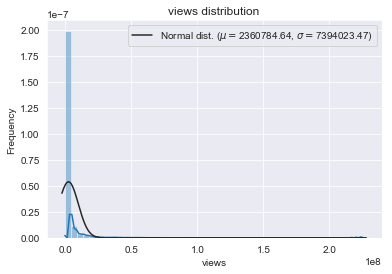

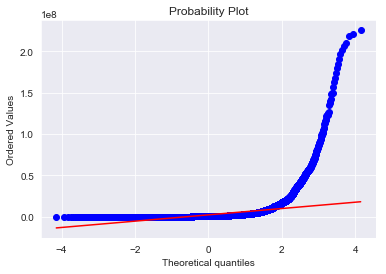

In [4]:
# views = df['views'].apply(lambda x: x + np.random.normal())
views = df['views']
sns.distplot(views, fit=norm);
mu, sigma = norm.fit(views)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('views distribution')

#Q-Q图
fig = plt.figure()
res = stats.probplot(views, plot=plt)
plt.show()


 mu = 74266.70 and sigma = 228882.54



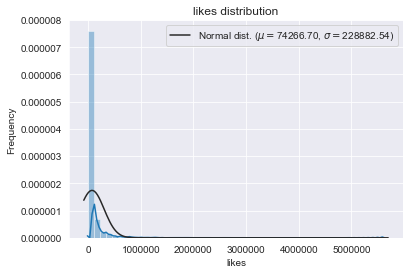

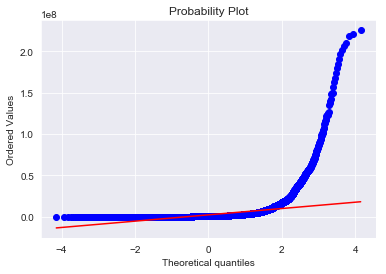

In [5]:
likes = df['likes']
sns.distplot(likes, fit=norm);
mu, sigma = norm.fit(likes)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('likes distribution')

#Q-Q图
fig = plt.figure()
res = stats.probplot(views, plot=plt)
plt.show()


 mu = 3711.40 and sigma = 29029.35



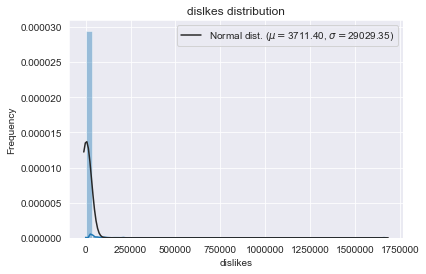

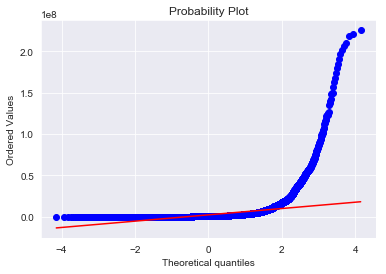

In [6]:
dislikes = df['dislikes']
sns.distplot(dislikes, fit=norm);
mu, sigma = norm.fit(dislikes)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('dislkes distribution')

#Q-Q图
fig = plt.figure()
res = stats.probplot(views, plot=plt)
plt.show()


 mu = 8446.80 and sigma = 37430.03



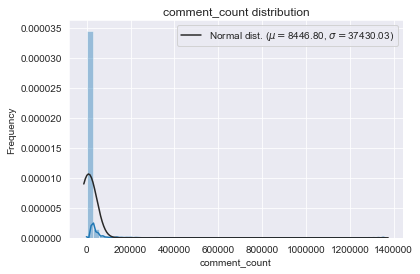

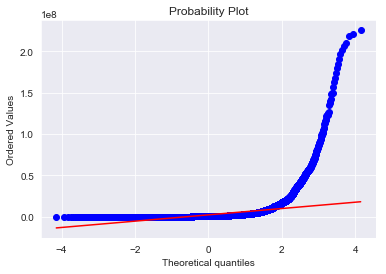

In [7]:
comment_count = df['comment_count']
sns.distplot(comment_count, fit=norm);
mu, sigma = norm.fit(comment_count)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('comment_count distribution')

#Q-Q图
fig = plt.figure()
res = stats.probplot(views, plot=plt)
plt.show()

由柱状图和QQ图可知，views，likes，dislikes，comment_count都不服从正态分布

# 盒图绘制

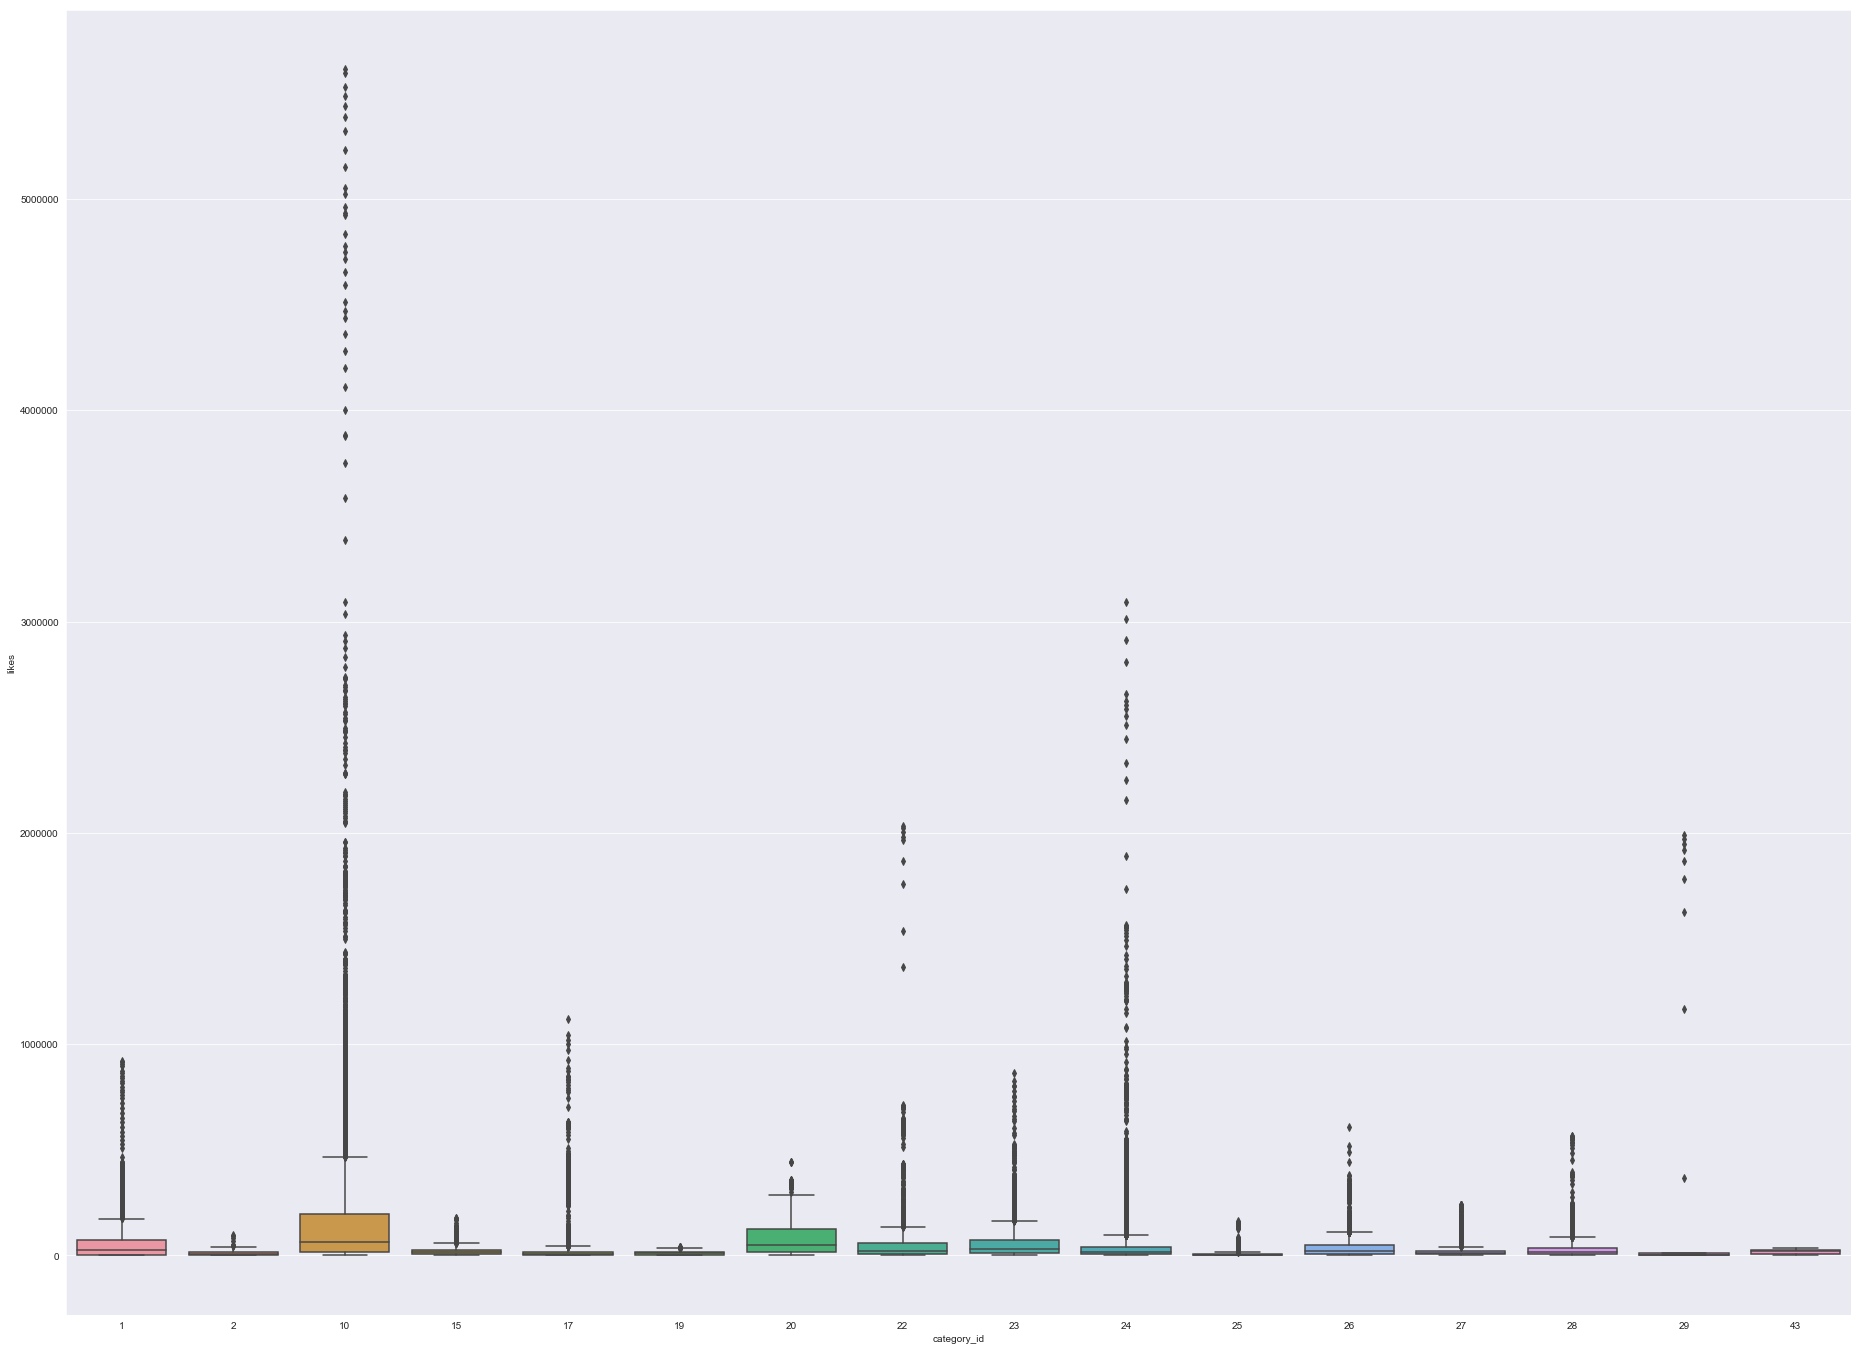

In [8]:
var = 'category_id'
data = pd.concat([df['likes'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(32, 24))
fig = sns.boxplot(x=var, y="likes", data=data)
# fig.axis(ymin=0, ymax=2300);

盒图的横坐标是代表视频类别的标号，category_id，纵轴是视频点赞数likes。由此图分析后可以发现，在某一种类的视频中，低点赞数的视频占所有视频的绝大多数，所以会出现很多点赞数较高的“离群值”。

我觉得，应该选取更能体现视频质量的类别值作为横坐标来进行盒图的绘制。

# 缺失值分析

In [9]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

可见只有description一列有570个缺失值，其他各项均无缺失值。

In [10]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data

,Missing Ratio
description,1.392


可见description一列缺失数据所占比重为1.392%

Text(0.5, 1.0, 'Percent missing data of feature')

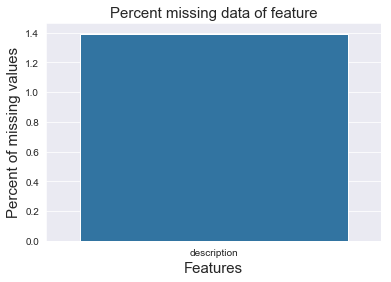

In [11]:
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data of feature', fontsize=15)

description是视频的描述性文本，可以认为缺失值是由于作者没有对上传的视频添加描述性文本，所以将其填充为None

In [12]:
df['description'] = df['description'].fillna('None')

再次观察数据集中是否还存在缺失值

In [13]:
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [14]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data

,Missing Ratio


由上述信息可以发现，此时数据集已没有缺失数据